<a href="https://colab.research.google.com/github/Alejandroll100/Alejandro-Lopez---Processamentos-TCC2/blob/main/Treinamento_YOLOv12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Configuração do ambiente


In [ ]:
from google.colab import drive

# Monta o Google Drive em /content/drive
drive.mount('/content/drive')


Mounted at /content/drive


### Avaliação de GPU


In [ ]:
!nvidia-smi

Sun Nov  2 06:26:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   55C    P0             30W /   72W |     545MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


### Instalar dependencias

A instalação do YOLOv12 é feita a través do GitHub dos desenvolvedores por meio do seguinte comando:

In [ ]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 153.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 126.9 MB/s eta 0:00:00


### Instalação do pacote Roboflow e Enlace do dataset de Embarcações

Nesta parte, instalamos o pacote Roboflow e pegamos o enlace do dataset de Embarcações criado no Roboflow. Essa base será usada para treinar o modelo YOLOv12. No código, proporciona-se uma chave API, necessária para accessar às bases de dados do Roboflow. Além disso, proporciona-se o nome do espaço do trabalho.


In [ ]:
!pip install roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="a0T2wJrHefPJmOlvYn42")
project = rf.workspace("deteco-de-embarcaes").project("deteccao-de-embarcacoes-mmbpl")
version = project.version(1)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Detecção-de-embarcações-1 in yolov12:: 100%|██████████| 730/730 [00:00<00:00, 10488.63it/s]


In [ ]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


## Ajuste fino do modelo YOLOv12

Podemos utilizar uma série de modelos que o YOLOv12 proporciona ( `yolov12s.pt`, `yolov12n.pt`, `yolov12m.pt`, `yolov12l.pt`, `yolov12x.pt`). Cada um apresenta vantagens diversas.

Aqui tambem ajustamos os hiperparâmetros a serem utilizados: número de épocas, tamanho do lote, learning rate, configurações de aumentação de dados (scale, mosaic, mixup, and copy-paste), entre outos.




In [ ]:
from ultralytics import YOLO

# inicializa o modelo
model = YOLO("yolov12n.yaml")

# treina carregando o config inteiro
results = model.train(cfg="/content/drive/MyDrive/amostras_TCC2/args_n_25.yaml", data=f"{dataset.location}/data.yaml")

New https://pypi.org/project/ultralytics/8.3.223 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=detect, mode=train, model=yolov12n.yaml, data=/content/Detecção-de-embarcações-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=True, freeze=None, multi_scale=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sho

train: Scanning /content/Detecção-de-embarcações-1/train/labels.cache... 251 images, 0 backgrounds, 0 corrupt: 100%|██████████| 251/251 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Detecção-de-embarcações-1/valid/labels.cache... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0005), 127 bias(decay=0.0)
TensorBoard: WARNING ⚠️ TensorBoard graph visualization failure Tracing failed sanity checks!
ERROR: Graphs differed across invocations!
	Graph diff:
		  graph(%self.1 : __torch__.ultralytics.nn.tasks.DetectionModel,
		        %x.1 : Tensor):
		    %model : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr[name="model"](%self.1)
		    %_21 : __torch__.ultralytics.nn.modules.head.Detect = prim::GetAttr[name="21"](%model)
		    %model.43 : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr[name="model"](%self.1)
		    %_20 : __torch__.ultralytics.nn.modules.block.C3k2 = prim::GetAttr[name="20"](%model.43)
		    %model.41 : __torch__.

       1/25         6G      5.496      12.15      4.654         34        448: 100%|██████████| 16/16 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.06it/s]

                   all         72        123          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.26G      5.213       11.4      4.156         28        640: 100%|██████████| 16/16 [00:02<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.88it/s]

                   all         72        123          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25       6.5G      3.778      6.797      3.535         31        928: 100%|██████████| 16/16 [00:03<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]

                   all         72        123          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      4.96G      3.104      4.794      2.798         20        832: 100%|██████████| 16/16 [00:02<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.29it/s]

                   all         72        123          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.85G       2.76      3.845      2.655         20        384: 100%|██████████| 16/16 [00:02<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.97it/s]

                   all         72        123          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.36G      2.574      3.032      2.105         13        448: 100%|██████████| 16/16 [00:02<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.93it/s]

                   all         72        123          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.78G      2.419       2.79      2.094         29        800: 100%|██████████| 16/16 [00:02<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.77it/s]

                   all         72        123    0.00417      0.732      0.156      0.043



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.81G      2.326      2.354      1.923         34        544: 100%|██████████| 16/16 [00:02<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.12it/s]

                   all         72        123      0.534      0.496      0.497      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.21G      2.248      2.173      1.769         25        416: 100%|██████████| 16/16 [00:02<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.95it/s]

                   all         72        123      0.628      0.504      0.583       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.86G      2.164      1.976      1.733         19        800: 100%|██████████| 16/16 [00:02<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.58it/s]

                   all         72        123      0.243      0.561      0.212     0.0744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.75G      2.094      1.874      1.602         23        480: 100%|██████████| 16/16 [00:02<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.02it/s]

                   all         72        123      0.525       0.63      0.615      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       5.5G      2.044      1.755      1.583         27        480: 100%|██████████| 16/16 [00:02<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.12it/s]

                   all         72        123      0.707      0.627      0.724      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.57G      1.998      1.668      1.689         27        672: 100%|██████████| 16/16 [00:02<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.02it/s]

                   all         72        123      0.501      0.742      0.503      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      4.49G      1.988      1.615      1.579         24        928: 100%|██████████| 16/16 [00:02<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.96it/s]

                   all         72        123      0.779      0.797      0.833      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.16G      1.939      1.601      1.673         21        480: 100%|██████████| 16/16 [00:02<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]

                   all         72        123      0.826      0.769      0.875      0.416


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.93G      1.817      1.558      1.629         22        576: 100%|██████████| 16/16 [00:03<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.64it/s]

                   all         72        123      0.834      0.821      0.865      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.51G      1.767       1.48      1.562         22        864: 100%|██████████| 16/16 [00:02<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.68it/s]

                   all         72        123      0.856      0.837      0.906      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.91G      1.873      1.376      1.466         17        416: 100%|██████████| 16/16 [00:02<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.10it/s]

                   all         72        123       0.87      0.829      0.907      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.43G       1.71      1.354      1.452         24        576: 100%|██████████| 16/16 [00:02<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.07it/s]

                   all         72        123      0.902      0.846      0.931      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25       5.9G       1.82      1.383      1.495         18        640: 100%|██████████| 16/16 [00:02<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]

                   all         72        123      0.921       0.87      0.938      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      7.32G      1.772      1.483      1.683         15        896: 100%|██████████| 16/16 [00:03<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.89it/s]

                   all         72        123       0.89      0.846      0.924      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.15G      1.697      1.203      1.344         30        448: 100%|██████████| 16/16 [00:02<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.10it/s]

                   all         72        123      0.905       0.85      0.942      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.11G      1.694      1.249      1.406         22        608: 100%|██████████| 16/16 [00:02<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]

                   all         72        123      0.896      0.846      0.941      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.01G      1.625      1.238      1.437         21        736: 100%|██████████| 16/16 [00:02<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.75it/s]

                   all         72        123      0.888      0.846      0.942      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25       5.9G      1.695      1.248      1.381         15        704: 100%|██████████| 16/16 [00:02<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.85it/s]

                   all         72        123      0.896      0.842      0.943       0.49



25 epochs completed in 0.030 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.4MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv12n summary (fused): 376 layers, 2,508,539 parameters, 0 gradients, 5.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]


                   all         72        123      0.896      0.842      0.943      0.493
Speed: 0.2ms preprocess, 1.3ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train2


### Salvar pasta de pesos e resultados


In [ ]:
from google.colab import files
import shutil

# Compactar a pasta (exemplo: "runs/detect/train")
shutil.make_archive("resultados_n_50", 'zip', "runs/detect/train")

# Baixar o arquivo ZIP
files.download("resultados_n_50.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Avaliar modelo

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train2/

args.yaml					   train_batch1.jpg
confusion_matrix_normalized.png			   train_batch240.jpg
confusion_matrix.png				   train_batch241.jpg
events.out.tfevents.1762050563.67c6fa39517d.644.1  train_batch242.jpg
F1_curve.png					   train_batch2.jpg
labels_correlogram.jpg				   val_batch0_labels.jpg
labels.jpg					   val_batch0_pred.jpg
P_curve.png					   val_batch1_labels.jpg
PR_curve.png					   val_batch1_pred.jpg
R_curve.png					   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


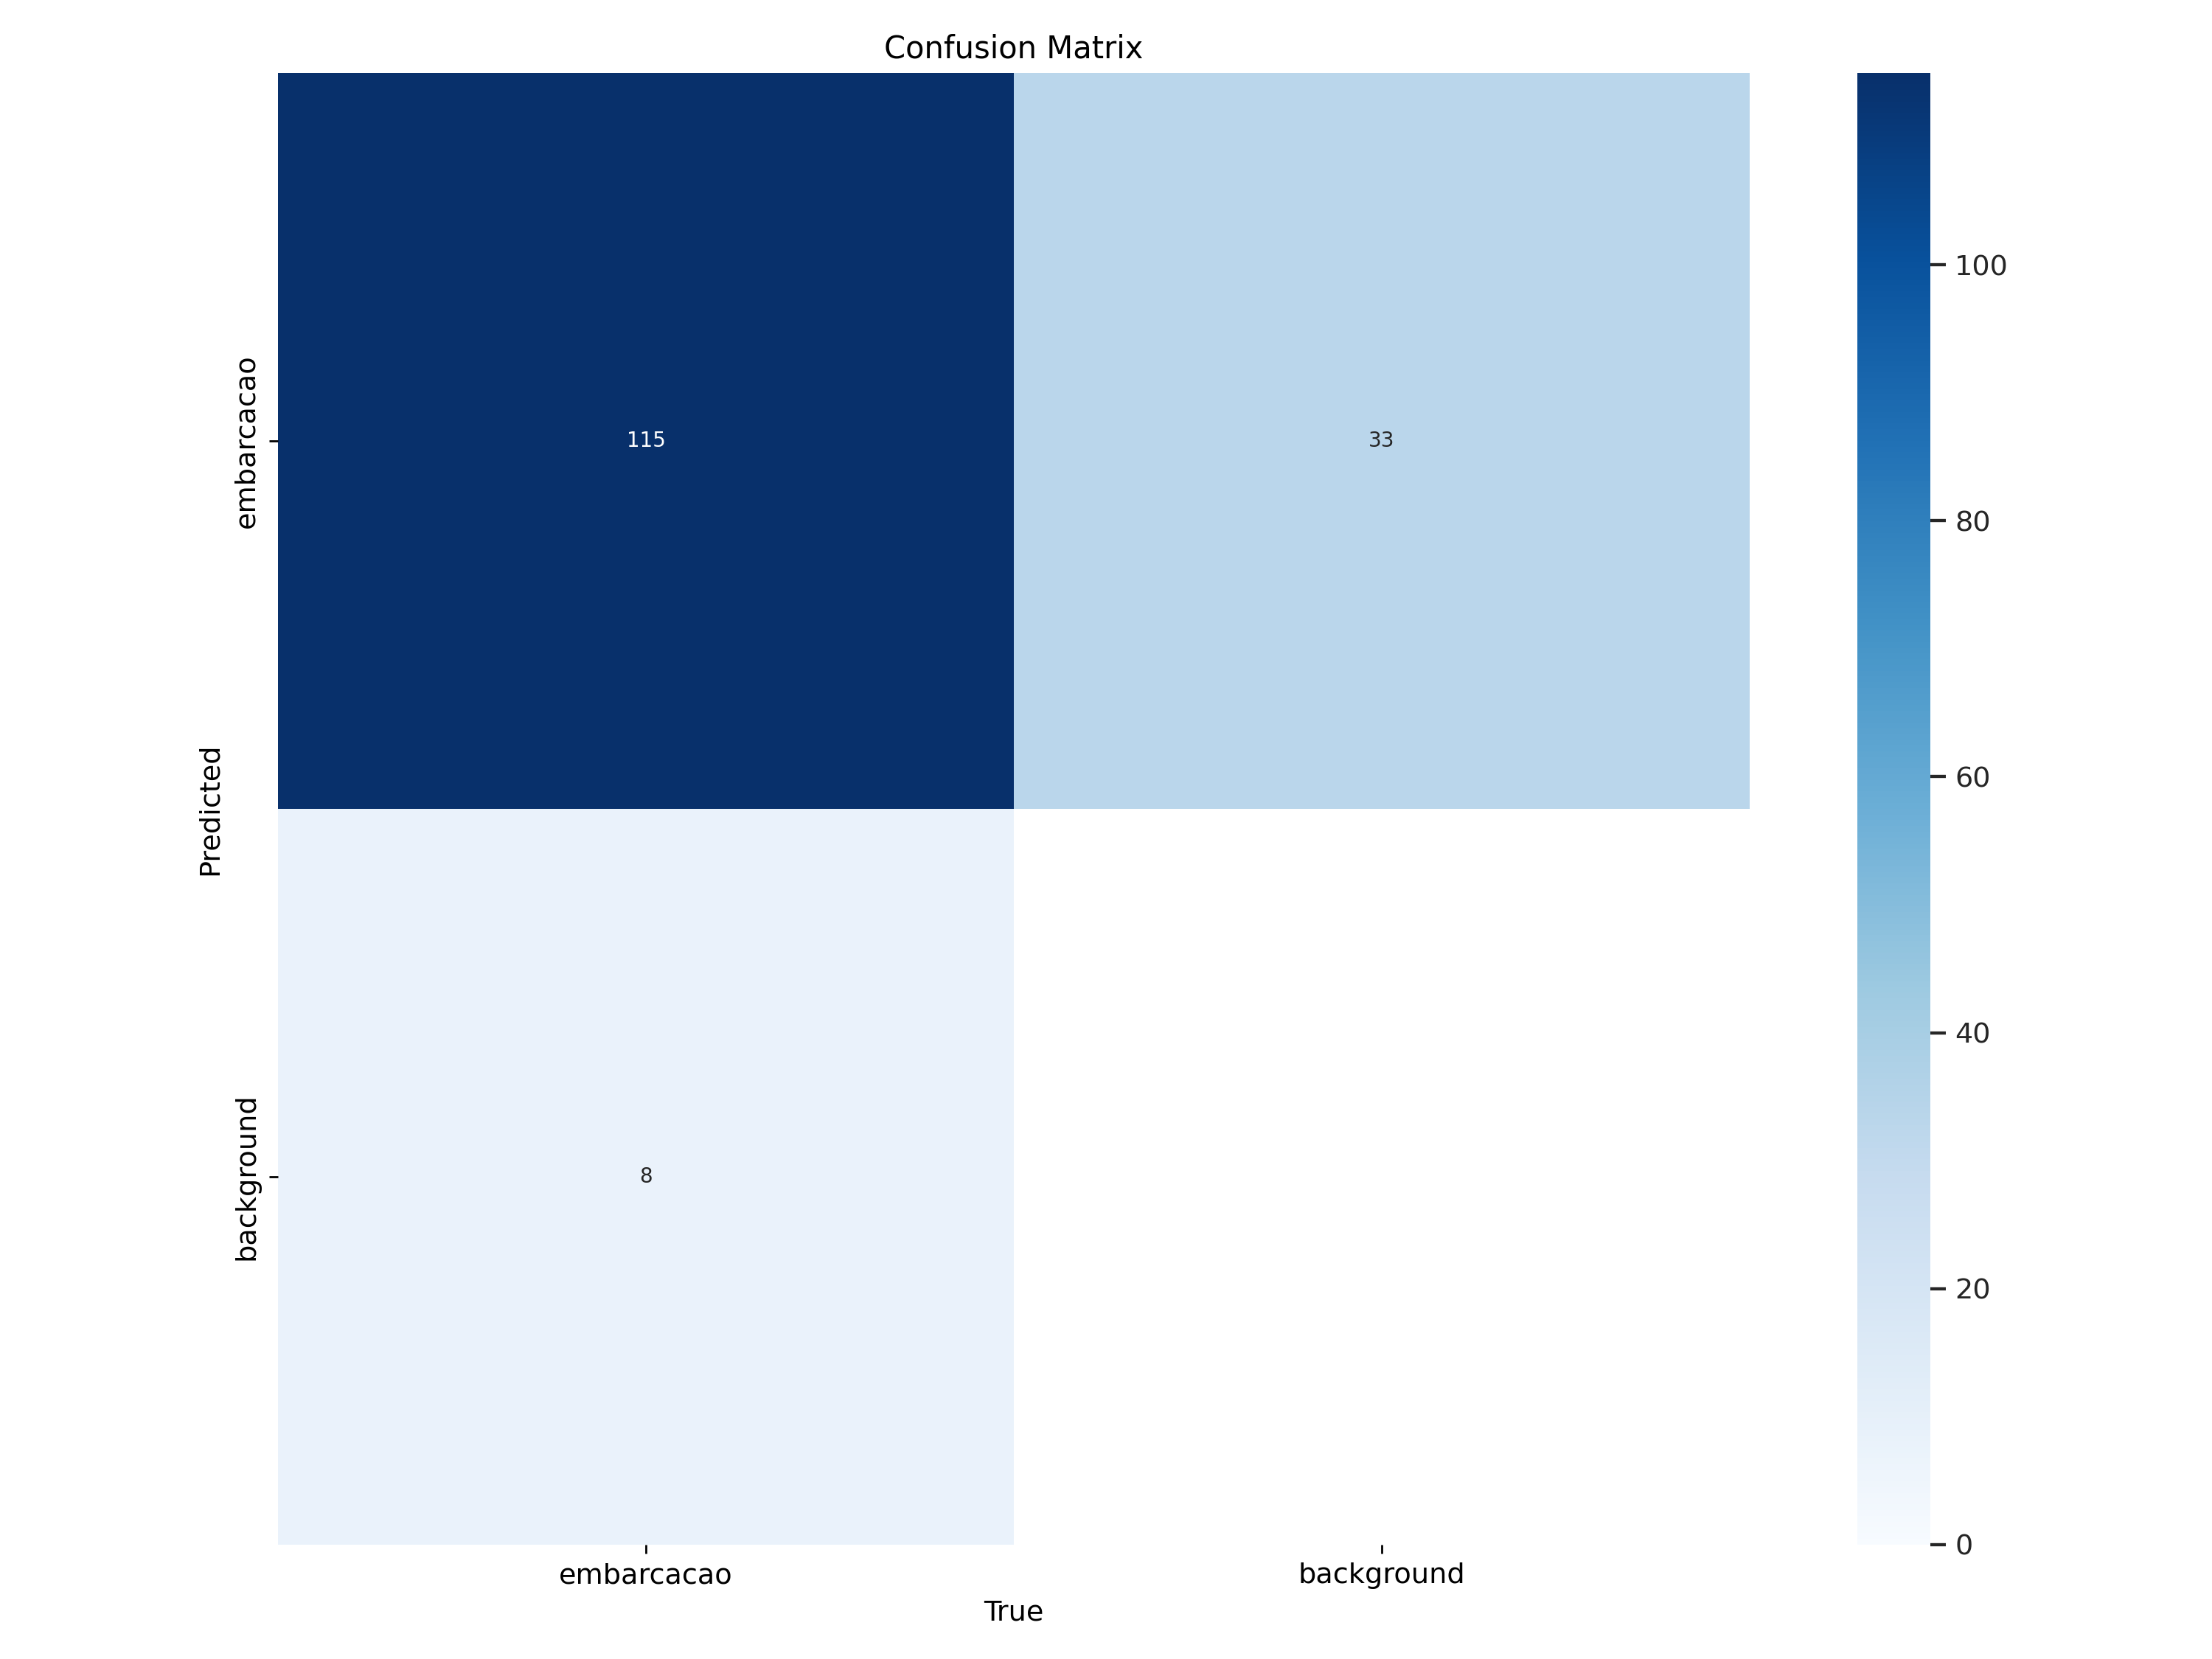

In [ ]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=1000)

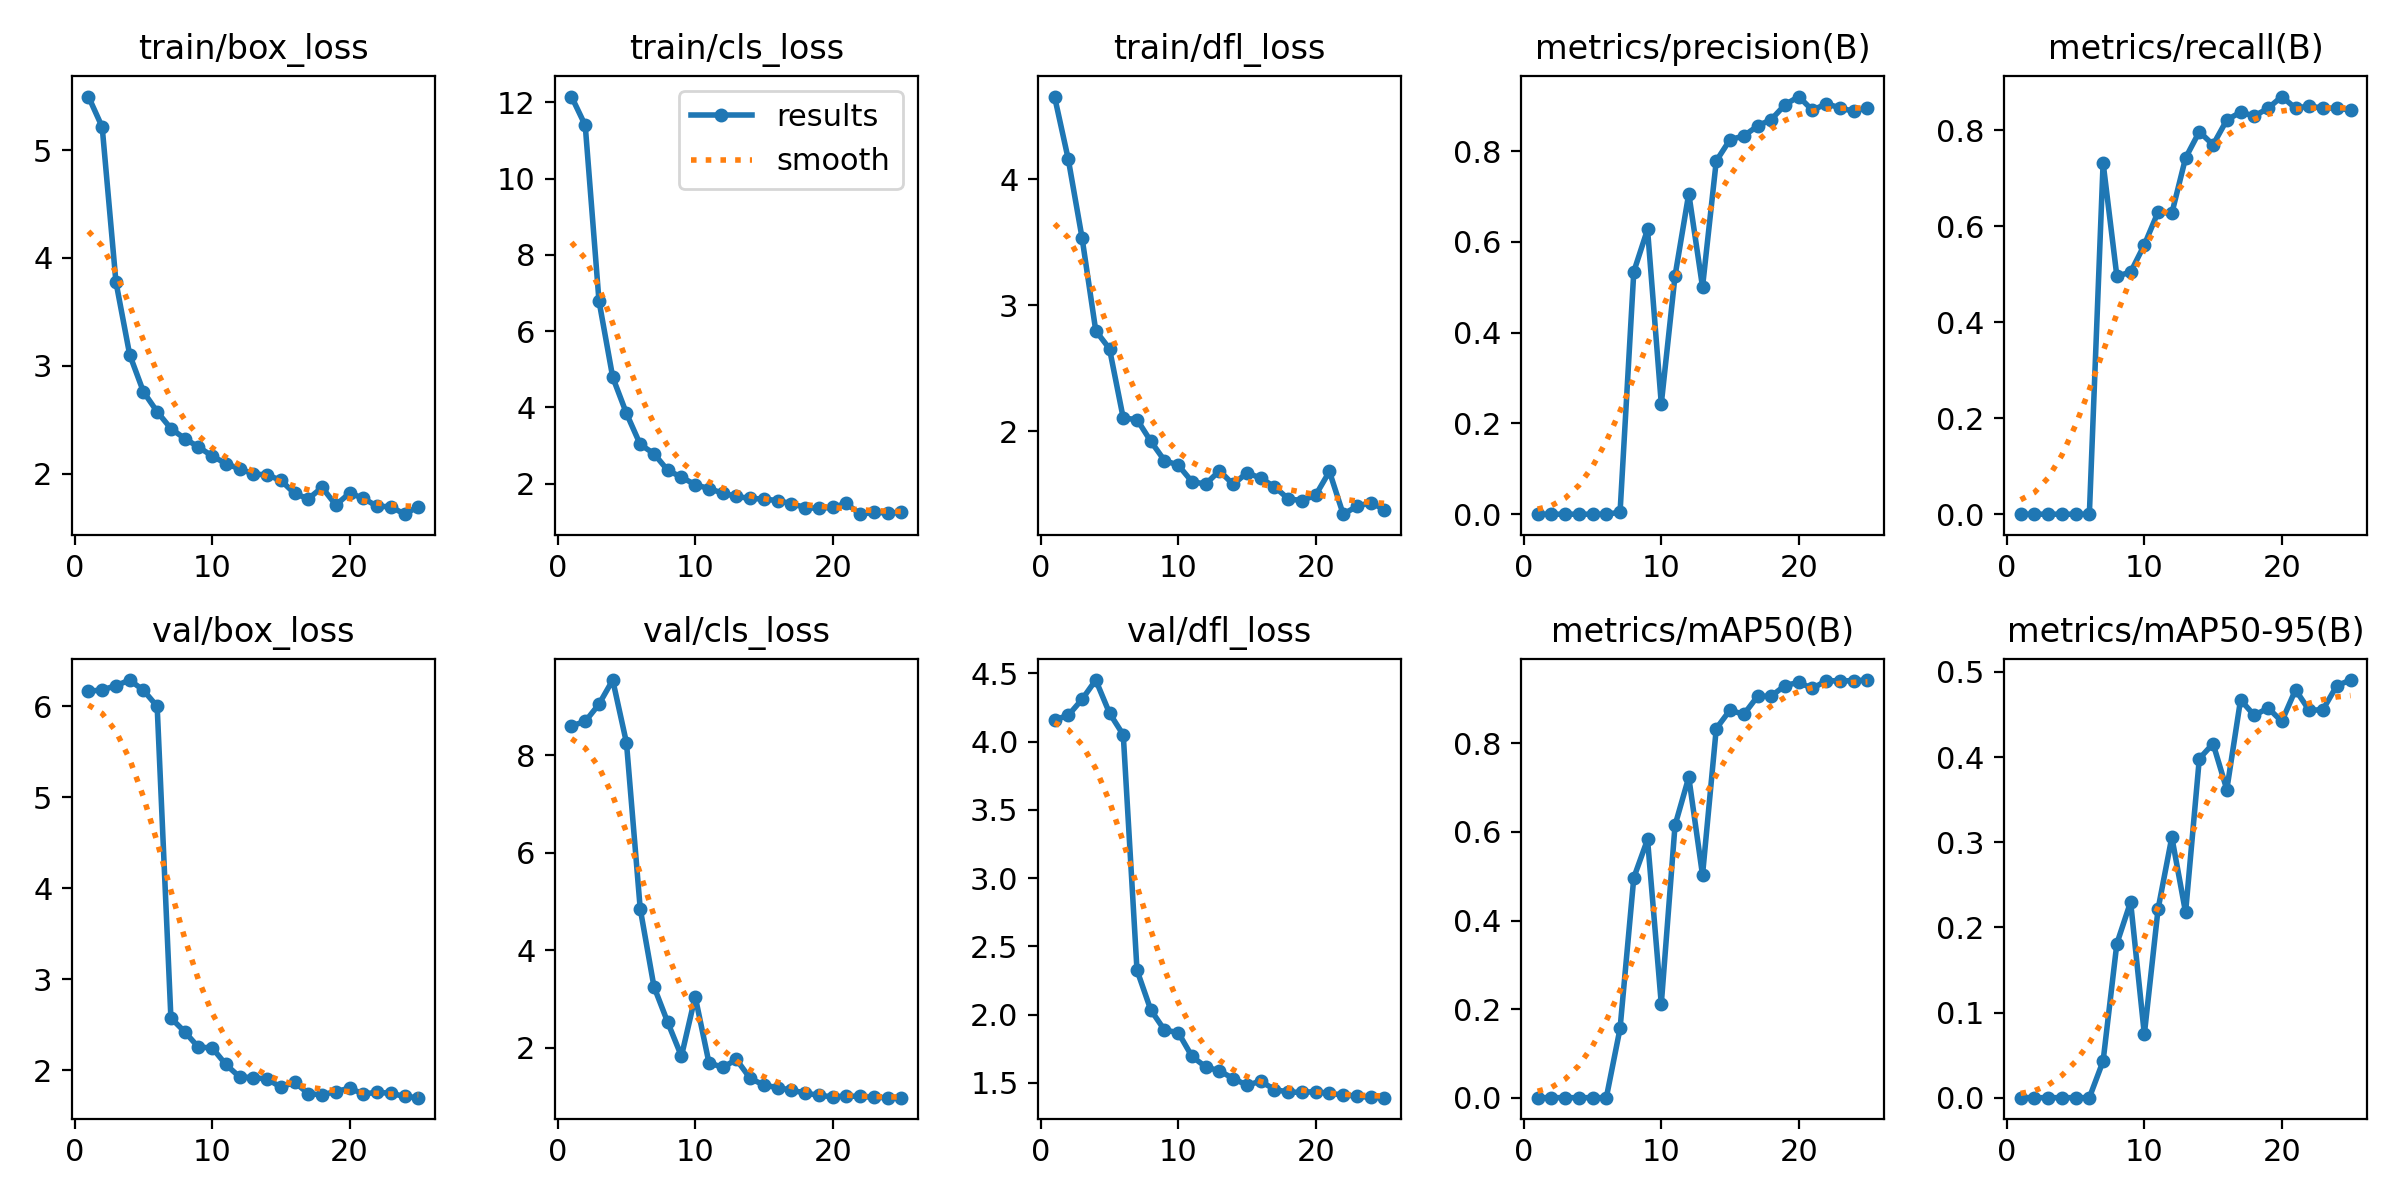

In [ ]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train2/results.png', width=1000)

In [ ]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

ds.classes

['embarcacao']

In [ ]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'/{HOME}/runs/detect/train2/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [ ]:
print("mAP 50:95", map.map50_95)
print("mAP 50", map.map50)
print("mAP 75", map.map75)

mAP 50:95 0.4949260481795511
mAP 50 0.9155119533176258
mAP 75 0.40097867152357486


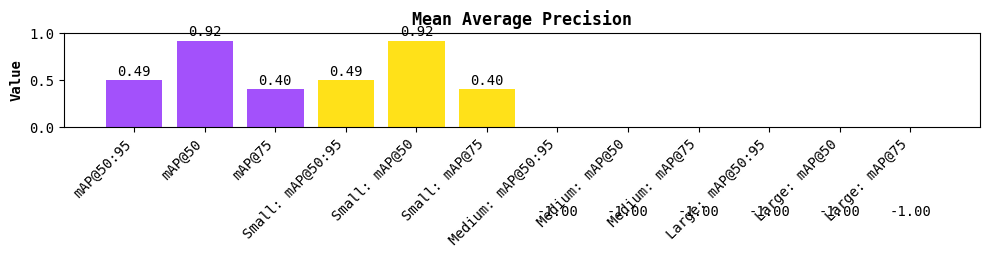

In [ ]:
map.plot()

## Rodar inferência

In [ ]:
import supervision as sv

model = YOLO(f'/{HOME}/runs/detect/train2/weights/best.pt')
#model = YOLO(f'/{HOME}/drive/MyDrive/amostras_TCC2/best_s/best.pt')

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/valid/images",
    annotations_directory_path=f"{dataset.location}/valid/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

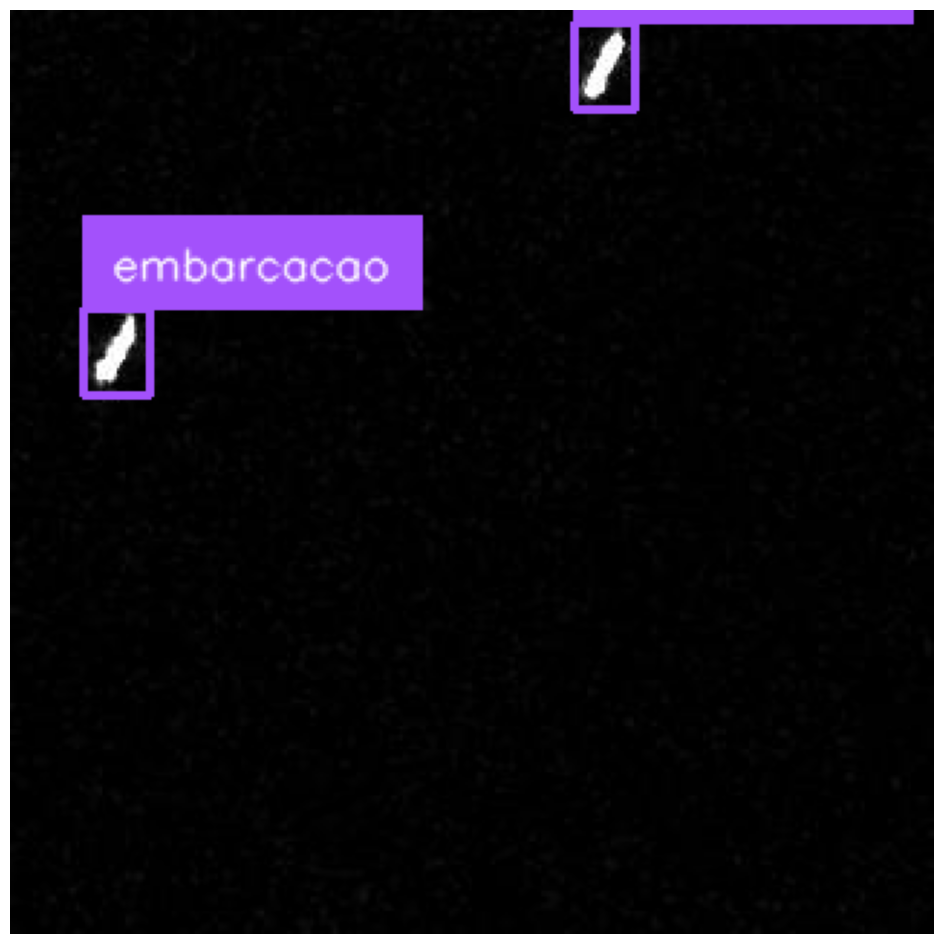

In [ ]:
import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)